# Indian liver patient Prediction

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

In [2]:
df = pd.read_csv("D:/GUVI/project4/indian_liver_patient.csv")  
df.head()

,Age,Gender,Total_Bilirubin,Direct_Bilirubin,Alkaline_Phosphotase,Alamine_Aminotransferase,Aspartate_Aminotransferase,Total_Protiens,Albumin,Albumin_and_Globulin_Ratio,Dataset
0,65,Female,0.7,0.1,187,16,18,6.8,3.3,0.90,1
1,62,Male,10.9,5.5,699,64,100,7.5,3.2,0.74,1
2,62,Male,7.3,4.1,490,60,68,7.0,3.3,0.89,1
3,58,Male,1.0,0.4,182,14,20,6.8,3.4,1.00,1
4,72,Male,3.9,2.0,195,27,59,7.3,2.4,0.40,1


In [3]:
df.tail()

,Age,Gender,Total_Bilirubin,Direct_Bilirubin,Alkaline_Phosphotase,Alamine_Aminotransferase,Aspartate_Aminotransferase,Total_Protiens,Albumin,Albumin_and_Globulin_Ratio,Dataset
578,60,Male,0.5,0.1,500,20,34,5.9,1.6,0.37,2
579,40,Male,0.6,0.1,98,35,31,6.0,3.2,1.10,1
580,52,Male,0.8,0.2,245,48,49,6.4,3.2,1.00,1
581,31,Male,1.3,0.5,184,29,32,6.8,3.4,1.00,1
582,38,Male,1.0,0.3,216,21,24,7.3,4.4,1.50,2


## Data preprocessing and cleaning

In [4]:
df.shape

(583, 11)

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 583 entries, 0 to 582
Data columns (total 11 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   Age                         583 non-null    int64  
 1   Gender                      583 non-null    object 
 2   Total_Bilirubin             583 non-null    float64
 3   Direct_Bilirubin            583 non-null    float64
 4   Alkaline_Phosphotase        583 non-null    int64  
 5   Alamine_Aminotransferase    583 non-null    int64  
 6   Aspartate_Aminotransferase  583 non-null    int64  
 7   Total_Protiens              583 non-null    float64
 8   Albumin                     583 non-null    float64
 9   Albumin_and_Globulin_Ratio  579 non-null    float64
 10  Dataset                     583 non-null    int64  
dtypes: float64(5), int64(5), object(1)
memory usage: 50.2+ KB


In [6]:
df.describe()

,Age,Total_Bilirubin,Direct_Bilirubin,Alkaline_Phosphotase,Alamine_Aminotransferase,Aspartate_Aminotransferase,Total_Protiens,Albumin,Albumin_and_Globulin_Ratio,Dataset
count,583.000000,583.000000,583.000000,583.000000,583.000000,583.000000,583.000000,583.000000,579.000000,583.000000
mean,44.746141,3.298799,1.486106,290.576329,80.713551,109.910806,6.483190,3.141852,0.947064,1.286449
std,16.189833,6.209522,2.808498,242.937989,182.620356,288.918529,1.085451,0.795519,0.319592,0.452490
min,4.000000,0.400000,0.100000,63.000000,10.000000,10.000000,2.700000,0.900000,0.300000,1.000000
25%,33.000000,0.800000,0.200000,175.500000,23.000000,25.000000,5.800000,2.600000,0.700000,1.000000
50%,45.000000,1.000000,0.300000,208.000000,35.000000,42.000000,6.600000,3.100000,0.930000,1.000000
75%,58.000000,2.600000,1.300000,298.000000,60.500000,87.000000,7.200000,3.800000,1.100000,2.000000
max,90.000000,75.000000,19.700000,2110.000000,2000.000000,4929.000000,9.600000,5.500000,2.800000,2.000000


In [7]:
df.columns.tolist()

['Age',
 'Gender',
 'Total_Bilirubin',
 'Direct_Bilirubin',
 'Alkaline_Phosphotase',
 'Alamine_Aminotransferase',
 'Aspartate_Aminotransferase',
 'Total_Protiens',
 'Albumin',
 'Albumin_and_Globulin_Ratio',
 'Dataset']

In [8]:
df.dtypes

Age                             int64
Gender                         object
Total_Bilirubin               float64
Direct_Bilirubin              float64
Alkaline_Phosphotase            int64
Alamine_Aminotransferase        int64
Aspartate_Aminotransferase      int64
Total_Protiens                float64
Albumin                       float64
Albumin_and_Globulin_Ratio    float64
Dataset                         int64
dtype: object

In [9]:
df.isnull().sum()

Age                           0
Gender                        0
Total_Bilirubin               0
Direct_Bilirubin              0
Alkaline_Phosphotase          0
Alamine_Aminotransferase      0
Aspartate_Aminotransferase    0
Total_Protiens                0
Albumin                       0
Albumin_and_Globulin_Ratio    4
Dataset                       0
dtype: int64

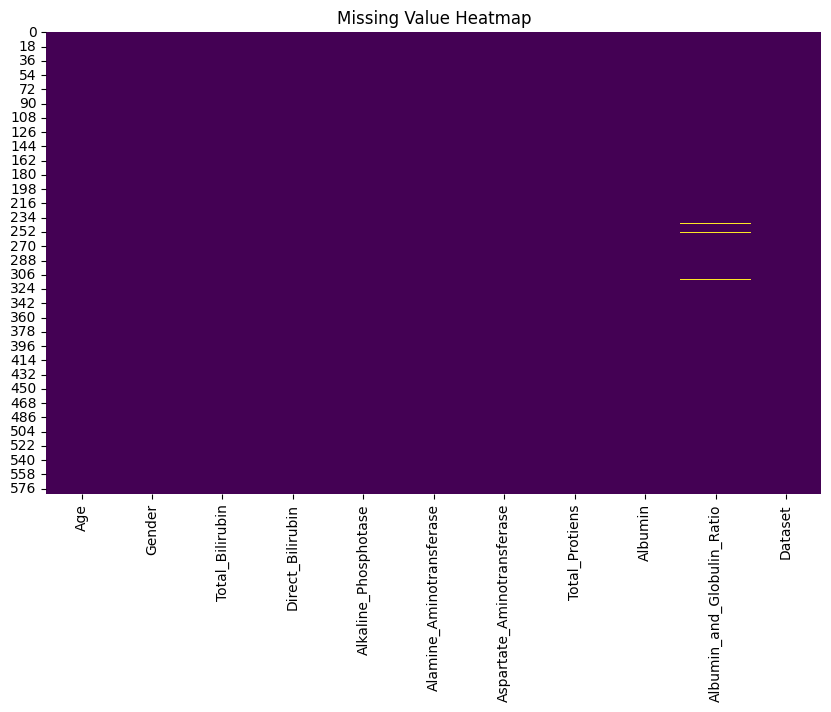

In [10]:
plt.figure(figsize=(10,6))
sns.heatmap(df.isnull(), cbar=False, cmap='viridis')
plt.title("Missing Value Heatmap")
plt.show()


In [11]:
df.isnull().sum().sum()

np.int64(4)

In [12]:
# Only 4 missing values in Albumin_and_Globulin_Ratio → can be handled by: Median imputation (numeric)

df['Albumin_and_Globulin_Ratio'] = df['Albumin_and_Globulin_Ratio'].fillna(
    df['Albumin_and_Globulin_Ratio'].median()
)



In [13]:
df.isnull().sum()

Age                           0
Gender                        0
Total_Bilirubin               0
Direct_Bilirubin              0
Alkaline_Phosphotase          0
Alamine_Aminotransferase      0
Aspartate_Aminotransferase    0
Total_Protiens                0
Albumin                       0
Albumin_and_Globulin_Ratio    0
Dataset                       0
dtype: int64

In [14]:
df.duplicated().sum()

np.int64(13)

In [15]:
# Remove duplicates

df.drop_duplicates(inplace=True)

In [16]:
df.shape

(570, 11)

In [17]:
# Automatically detect numeric columns
numeric_features = df.select_dtypes(include=['int64', 'float64']).columns.tolist()
print("numeric_features:", numeric_features )

# Automatically detect categorical columns
categorical_features = df.select_dtypes(include=['object', 'category']).columns.tolist()
print("categorical_features:", categorical_features )

numeric_features: ['Age', 'Total_Bilirubin', 'Direct_Bilirubin', 'Alkaline_Phosphotase', 'Alamine_Aminotransferase', 'Aspartate_Aminotransferase', 'Total_Protiens', 'Albumin', 'Albumin_and_Globulin_Ratio', 'Dataset']
categorical_features: ['Gender']


### EDA

In [18]:
df['Gender'].unique()

array(['Female', 'Male'], dtype=object)

Gender
Male      430
Female    140
Name: count, dtype: int64


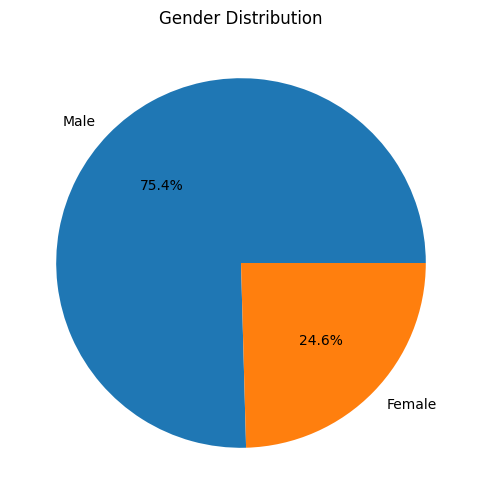

In [19]:
import matplotlib.pyplot as plt

# Count values
gender_counts = df['Gender'].value_counts()
print(gender_counts)

# Plot
plt.figure(figsize=(6,6))
plt.pie(
    gender_counts.values,
    labels=gender_counts.index,
    autopct='%1.1f%%'
)
plt.title("Gender Distribution")
plt.show()


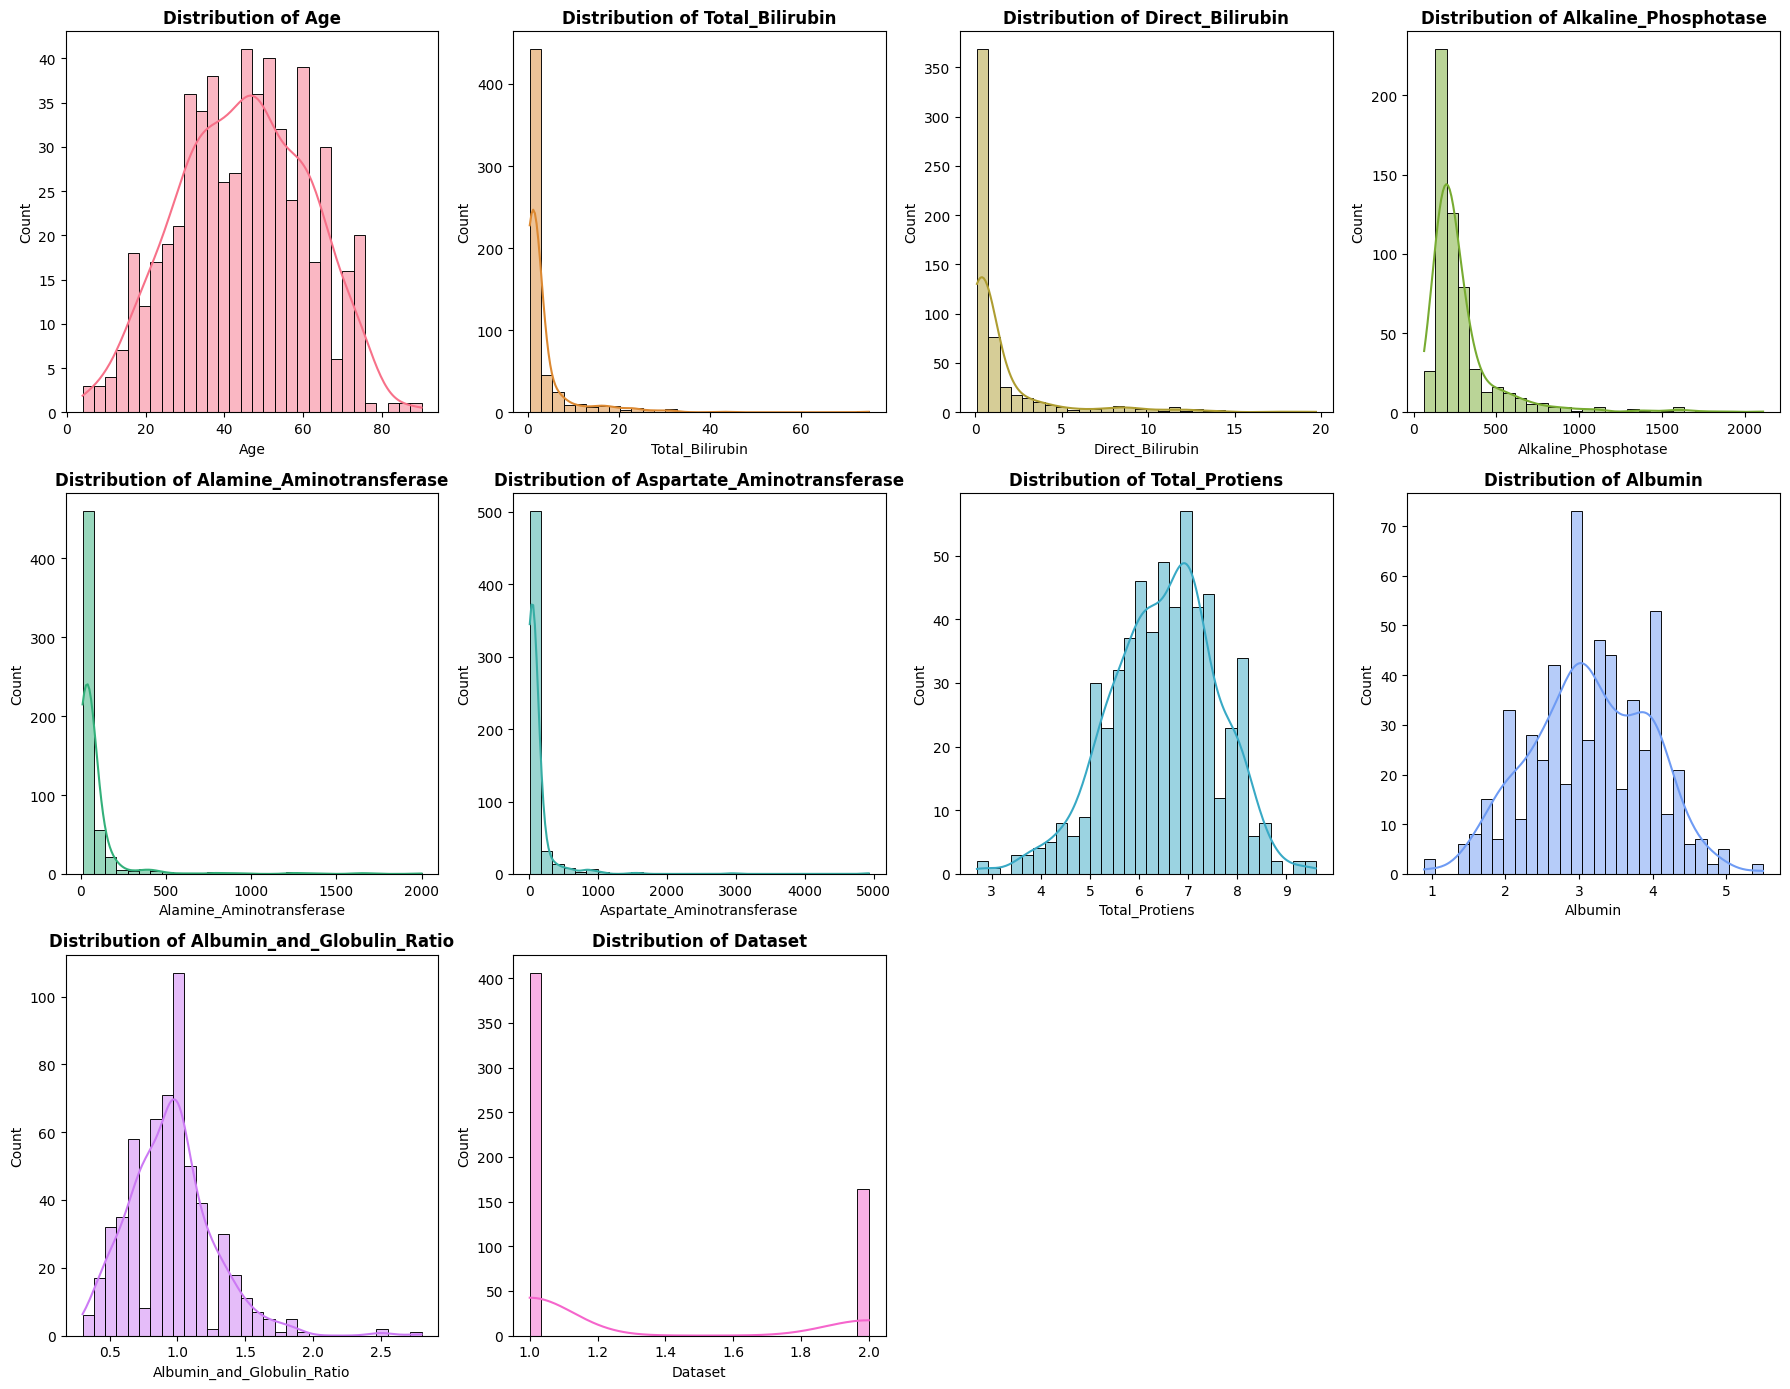

In [20]:
# Distribution of all numeric columns


# Define color palette
colors = sns.color_palette("husl", len(numeric_features))

# Determine grid size (4x4 for up to 16 features)
rows, cols = 3, 4
fig, axes = plt.subplots(rows, cols, figsize=(18, 14))
axes = axes.flatten()

# Loop through features
for i, feature in enumerate(numeric_features):
    sns.histplot(df[feature], kde=True, bins=30, color=colors[i], ax=axes[i])
    axes[i].set_title(f'Distribution of {feature}', fontsize=12, fontweight='bold')
    axes[i].set_xlabel(feature)
    axes[i].set_ylabel('Count')

# Remove unused axes
for j in range(i + 1, len(axes)):
    fig.delaxes(axes[j])

plt.tight_layout()
plt.show()




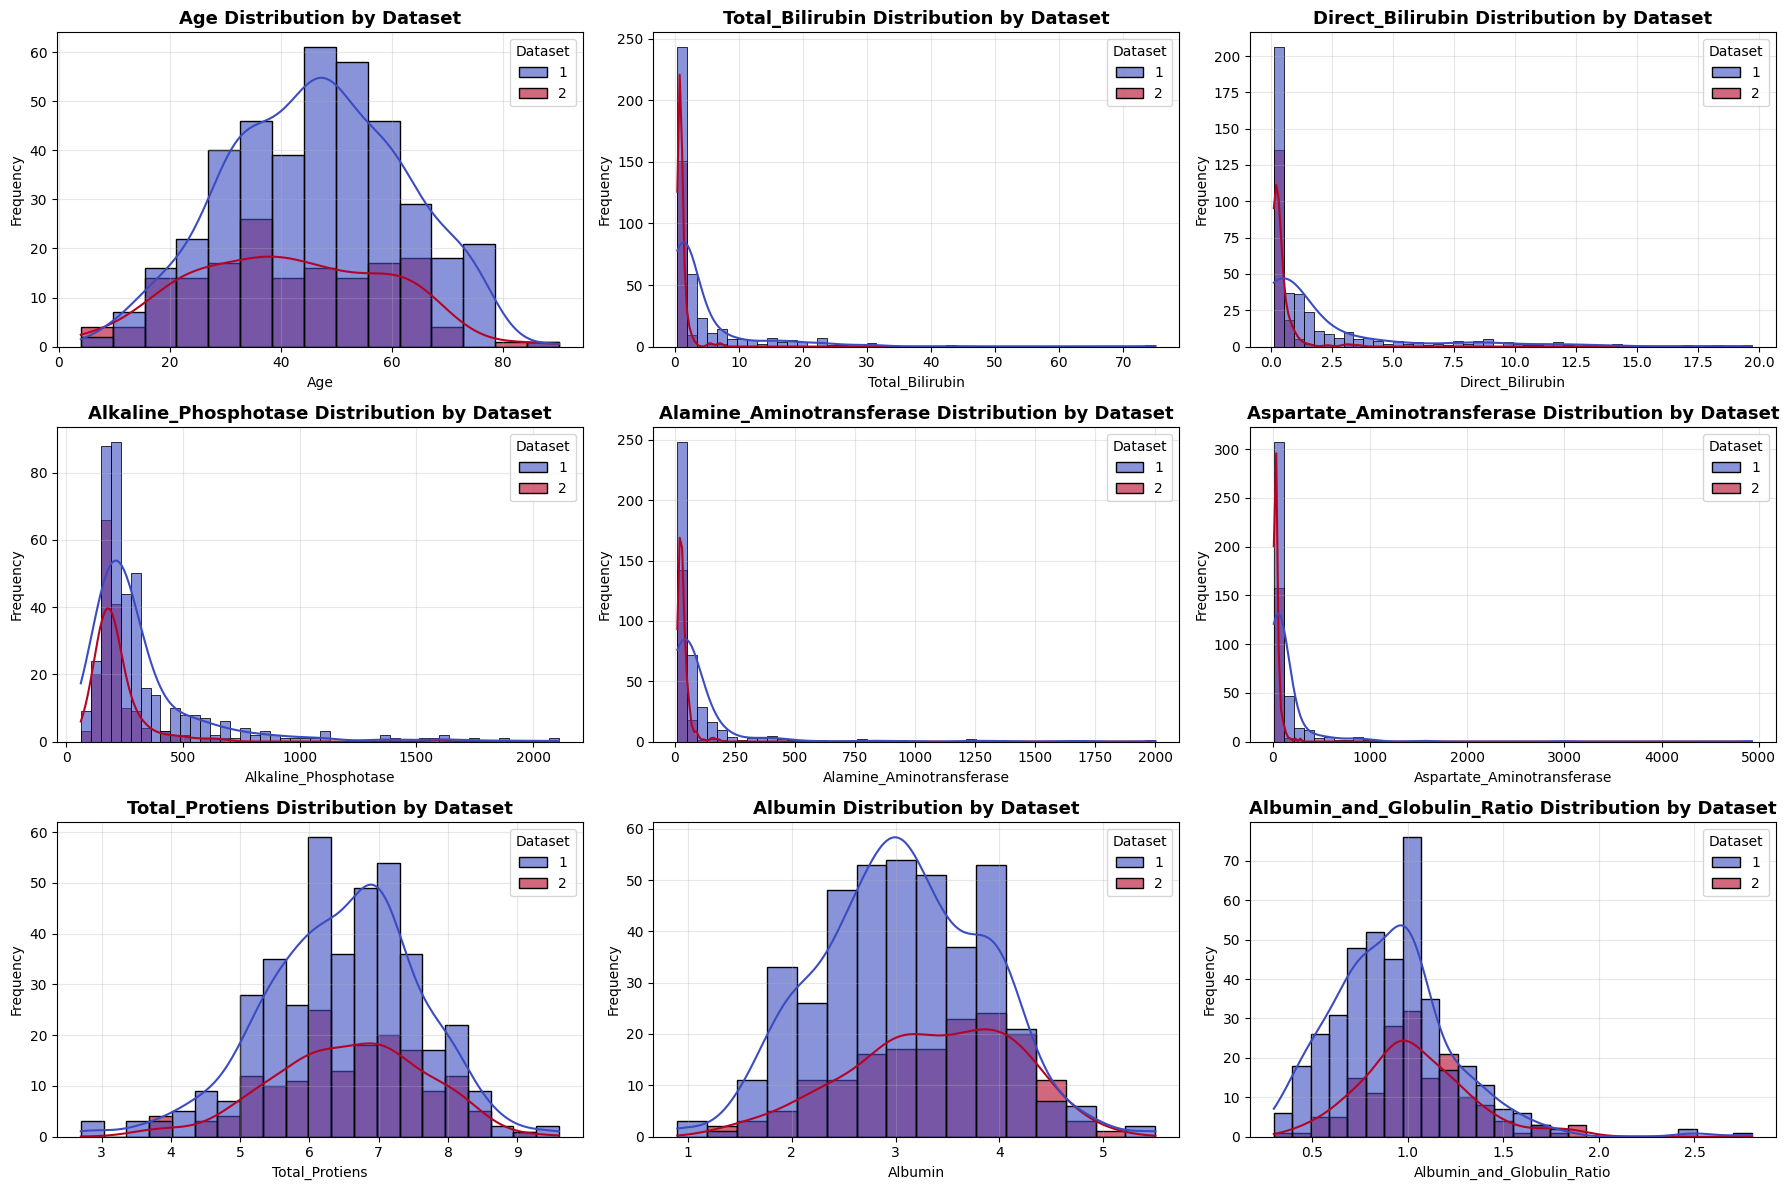

In [21]:
import matplotlib.pyplot as plt
import seaborn as sns

# Numerical features from your dataset
num_cols = [
    'Age', 'Total_Bilirubin', 'Direct_Bilirubin', 'Alkaline_Phosphotase',
    'Alamine_Aminotransferase', 'Aspartate_Aminotransferase',
    'Total_Protiens', 'Albumin', 'Albumin_and_Globulin_Ratio'
]

# Grid layout (3 rows × 3 columns)
rows, cols = 3, 3
fig, axes = plt.subplots(rows, cols, figsize=(18, 12))
axes = axes.flatten()

# Plot histograms
for i, col in enumerate(num_cols):
    sns.histplot(
        data=df,
        x=col,
        hue='Dataset',
        kde=True,
        palette='coolwarm',
        alpha=0.6,
        ax=axes[i]
    )

    axes[i].set_title(f'{col} Distribution by Dataset', fontsize=13, fontweight='bold')
    axes[i].set_xlabel(col)
    axes[i].set_ylabel("Frequency")
    axes[i].grid(True, alpha=0.3)

# Remove extra plots if any
for j in range(len(num_cols), rows * cols):
    fig.delaxes(axes[j])

plt.tight_layout()
plt.show()


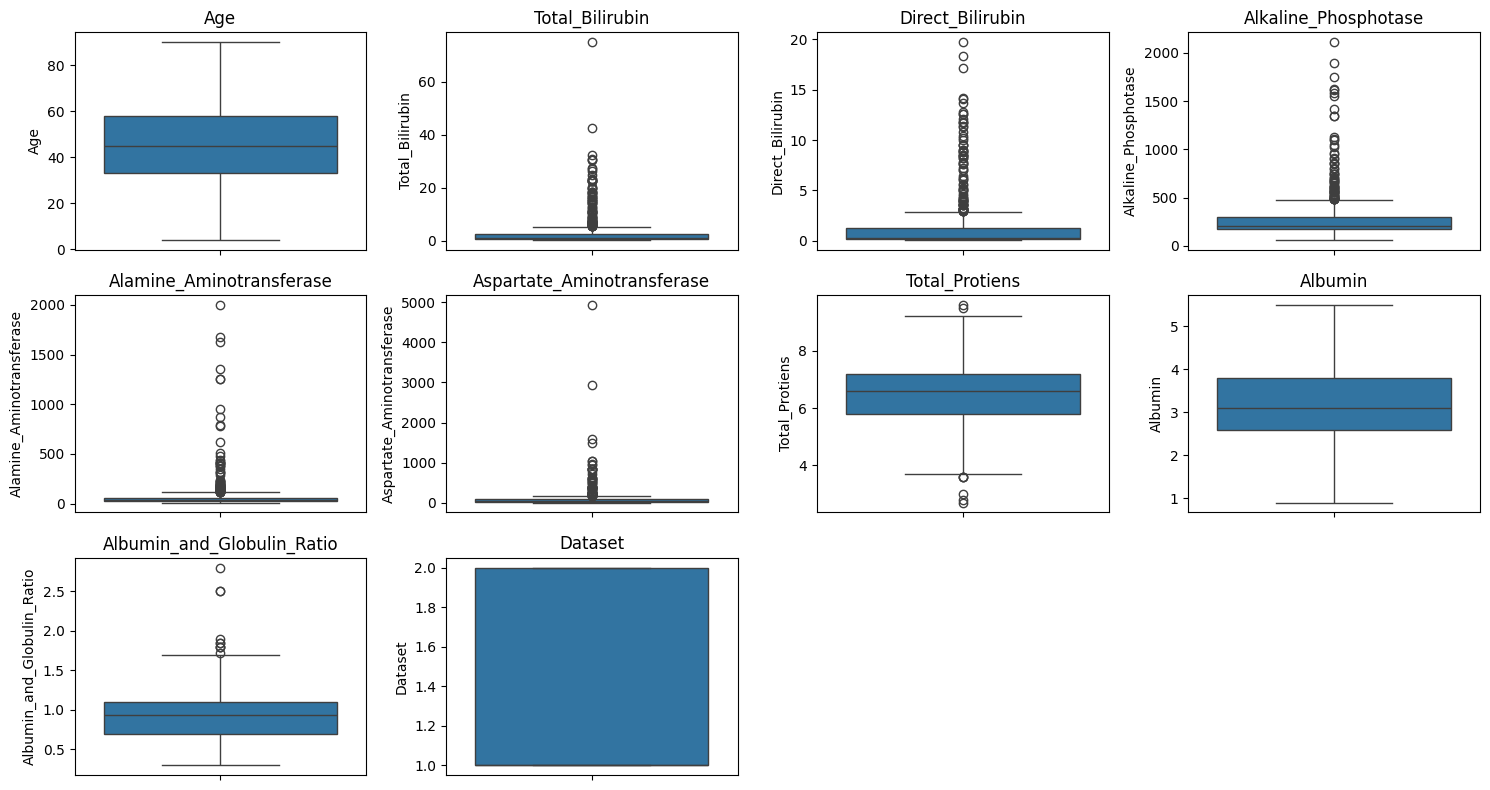

In [22]:

import math

# Batch size (number of plots per page)
batch_size = 12
total_cols = len(numeric_features)
num_batches = math.ceil(total_cols / batch_size)

# Plot in batches
for batch in range(num_batches):
    start = batch * batch_size
    end = start + batch_size
    cols_to_plot = numeric_features[start:end]

    plt.figure(figsize=(15, 8))
    
    for i, col in enumerate(cols_to_plot):
        plt.subplot(3, 4, i + 1)
        sns.boxplot(y=df[col])
        plt.title(col)
    
    
    plt.tight_layout()
    plt.show()


In [23]:
# Detecting outliers

cols_to_check = [ 'Total_Bilirubin', 'Direct_Bilirubin', 'Alkaline_Phosphotase', 'Alamine_Aminotransferase', 
                 'Aspartate_Aminotransferase', 'Total_Protiens', 'Albumin_and_Globulin_Ratio' ]
outlier_summary = {}

for col in cols_to_check:
    Q1 = df[col].quantile(0.05)
    Q3 = df[col].quantile(0.95)
    IQR = Q3 - Q1
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR
    
    # detect outliers
    outliers = df[(df[col] < lower_bound) | (df[col] > upper_bound)][col]
    outlier_summary[col] = {
        'Lower_Bound': lower_bound,
        'Upper_Bound': upper_bound,
        'Num_Outliers': len(outliers)
    }

outlier_df = pd.DataFrame(outlier_summary).T
print(outlier_df)


                            Lower_Bound  Upper_Bound  Num_Outliers
Total_Bilirubin                -23.2650      40.3750           2.0
Direct_Bilirubin               -12.4325      20.9875           0.0
Alkaline_Phosphotase          -725.2500    1571.1500           6.0
Alamine_Aminotransferase      -309.1500     555.2500          11.0
Aspartate_Aminotransferase    -563.3250     978.8750           6.0
Total_Protiens                  -0.6500      13.3500           0.0
Albumin_and_Globulin_Ratio      -1.0000       3.0000           0.0


In [24]:
#Cap the Outliers

cols_to_cap = [ 'Total_Bilirubin', 'Direct_Bilirubin', 'Alkaline_Phosphotase', 'Alamine_Aminotransferase', 
                 'Aspartate_Aminotransferase', 'Total_Protiens', 'Albumin_and_Globulin_Ratio' ]

for col in cols_to_cap:
    lower = df[col].quantile(0.05)   # 5th percentile
    upper = df[col].quantile(0.95)   # 95th percentile
    
    # winsorization (cap both sides)
    df[col] = np.where(df[col] < lower, lower,
                       np.where(df[col] > upper, upper, df[col]))

print("Capping completed for lower & upper outliers!")


Capping completed for lower & upper outliers!


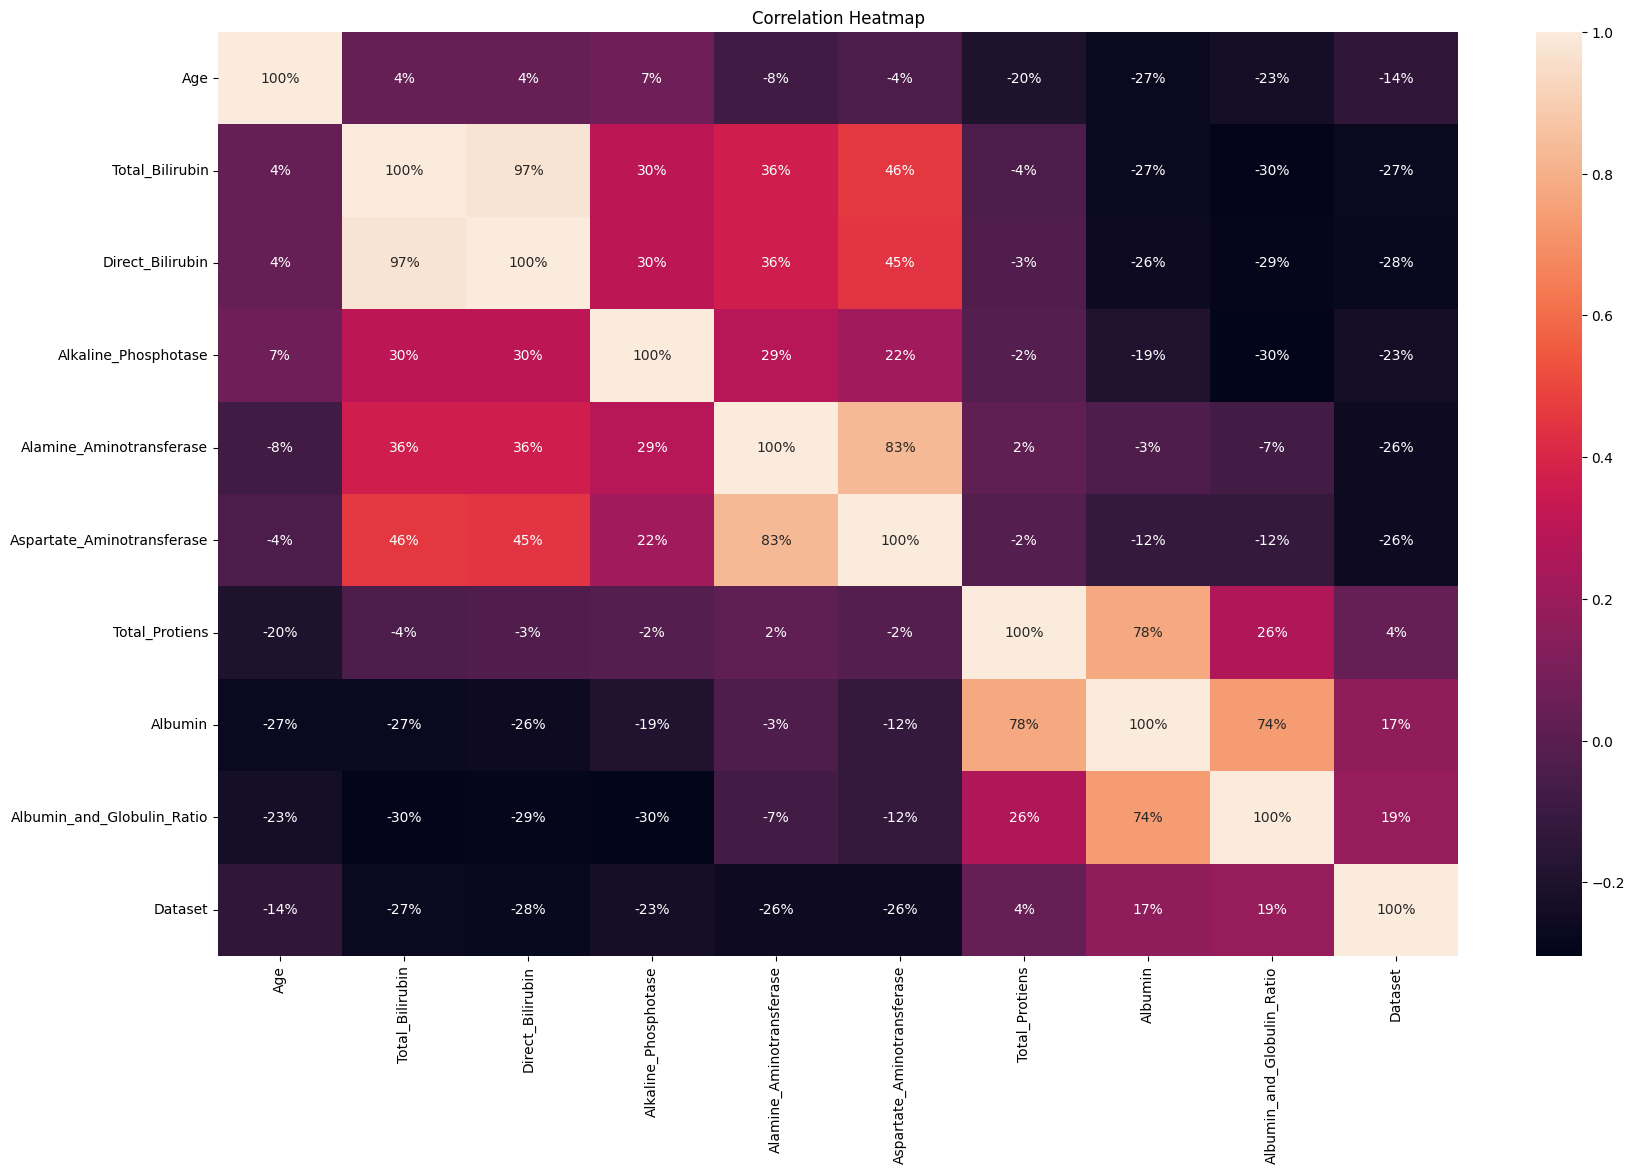

Correlation of features with Dataset:
Dataset                       1.000000
Albumin_and_Globulin_Ratio    0.189578
Albumin                       0.166835
Total_Protiens                0.038029
Age                          -0.138093
Alkaline_Phosphotase         -0.231751
Alamine_Aminotransferase     -0.260920
Aspartate_Aminotransferase   -0.261965
Total_Bilirubin              -0.269982
Direct_Bilirubin             -0.276386
Name: Dataset, dtype: float64


In [25]:
# Convert Dataset to numeric for correlation
df['Dataset'].astype(int).map({1: 1, 2: 0})

corr = df.corr(numeric_only=True)

df_numeric = df.select_dtypes(include='number')
plt.figure(figsize=(20,12))
sns.heatmap(df_numeric.corr(),annot=True,fmt='.0%')
plt.title('Correlation Heatmap')
plt.show()

# Show features most correlated with Attrition
print("Correlation of features with Dataset:")
print(corr['Dataset'].sort_values(ascending=False))



In [26]:
df['Dataset'].unique()


array([1, 2])

In [27]:
df['Dataset'].value_counts()


Dataset
1    406
2    164
Name: count, dtype: int64

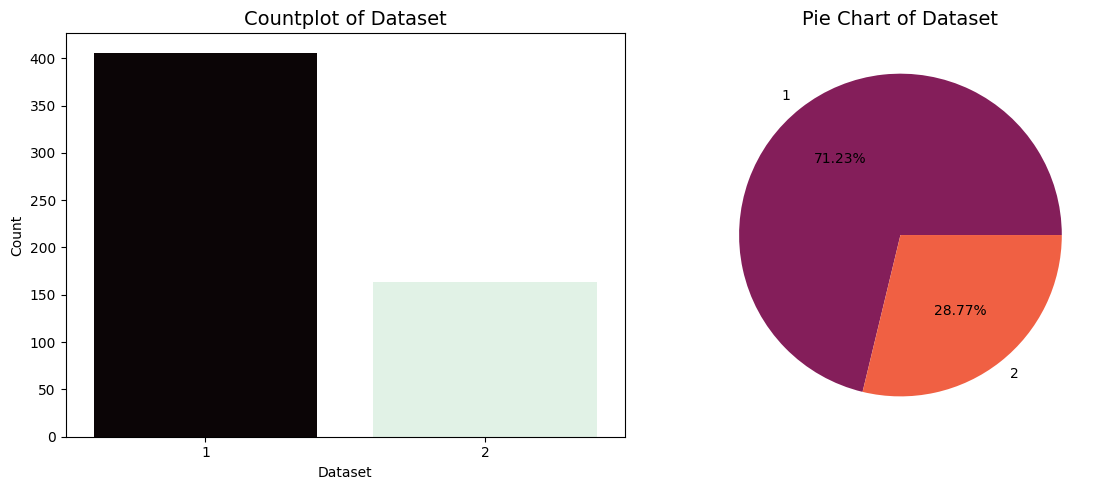

In [28]:
# Countplot and Piechart for Dataset 

categorical_cols = ['Dataset']  # you can add more categorical columns here
palettes = ['mako', 'rocket', 'crest', 'viridis', 'coolwarm']  # new palette choices

# Create subplots: 1 row, 2 columns
fig, axes = plt.subplots(nrows=1, ncols=2, figsize=(12, 5))

# Countplot with a new color from palette
count_colors = sns.color_palette(palettes[0], n_colors=df['Dataset'].nunique())
sns.countplot(
    x='Dataset',
    hue='Dataset',  # explicitly assign hue
    data=df,
    palette='mako',
    legend=False,     # optional, hides duplicate legend
    ax=axes[0]
)

axes[0].set_title('Countplot of Dataset', fontsize=14)
axes[0].set_xlabel('Dataset')
axes[0].set_ylabel('Count')

# Pie chart with a different palette
pie_colors = sns.color_palette(palettes[1], n_colors=df['Dataset'].nunique())
df['Dataset'].value_counts().plot(
    kind='pie',
    autopct='%.2f%%',
    colors=pie_colors,
    ax=axes[1]
)
axes[1].set_ylabel('')
axes[1].set_title('Pie Chart of Dataset', fontsize=14)

plt.tight_layout()
plt.show()


In [29]:
df.to_csv('D:/GUVI/project4/indian_liver_patient_cleaned.csv', index=False)


## Machine learning model development

Predict the Indian Liver Patient

Target variable - Dataset

In [30]:
# Load dataset
# ---------------------------
df = pd.read_csv('D:/GUVI/project4/indian_liver_patient_cleaned.csv')

In [31]:
df = df.dropna(subset=['Dataset'])
df['Dataset'] = df['Dataset'].map({1.0: 1, 2.0: 0})


In [32]:
from sklearn.model_selection import train_test_split

Feature_Names = df.drop('Dataset', axis=1)

X = df.drop('Dataset', axis=1)
y = df['Dataset']

X_train, X_test, y_train, y_test = train_test_split(
    X, y, 
    test_size=0.2, 
    random_state=42,
    stratify=y
)


In [33]:
num_cols = X.select_dtypes(include=['int64', 'float64']).columns
cat_cols = X.select_dtypes(include=['object']).columns


In [34]:
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.compose import ColumnTransformer

preprocessor = ColumnTransformer(transformers=[
    ('num', StandardScaler(), num_cols),
    ('cat', OneHotEncoder(handle_unknown='ignore'), cat_cols)
])


In [35]:
from imblearn.pipeline import Pipeline
from imblearn.over_sampling import SMOTE

pipeline = Pipeline(steps=[
    ('preprocess', preprocessor),
    ('smote', SMOTE(random_state=42)),
    ('model', None)  # placeholder
])


In [36]:
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier
from xgboost import XGBClassifier

models = {
    "Logistic Regression": LogisticRegression(max_iter=200),
    "Random Forest": RandomForestClassifier(),
    "SVM": SVC(),
    "KNN": KNeighborsClassifier(),
    "XGBoost": XGBClassifier(eval_metric='logloss')
}


In [37]:
from sklearn.model_selection import cross_val_score
from sklearn.metrics import make_scorer, accuracy_score, precision_score, recall_score, f1_score, roc_auc_score
import pandas as pd

# Custom scoring dictionary
scoring = {
    'accuracy': 'accuracy',
    'precision': make_scorer(precision_score),
    'recall': make_scorer(recall_score),
    'f1': 'f1',
    'roc_auc': 'roc_auc'
}

results = []

for name, model in models.items():
    pipeline.set_params(model=model)

    scores = {}
    for metric_name, metric in scoring.items():
        score = cross_val_score(pipeline, X_train, y_train, cv=5, scoring=metric).mean()
        scores[metric_name] = score
    
    results.append([
        name,
        scores['accuracy'],
        scores['precision'],
        scores['recall'],
        scores['f1'],
        scores['roc_auc']
    ])

df_results = pd.DataFrame(
    results,
    columns=["Model", "Accuracy", "Precision", "Recall", "F1 Score", "ROC-AUC"]
)

print(df_results)


                 Model  Accuracy  Precision    Recall  F1 Score   ROC-AUC
0  Logistic Regression  0.633731   0.863785  0.581538  0.690557  0.735236
1        Random Forest  0.660105   0.755687  0.741538  0.754386  0.684696
2                  SVM  0.611825   0.852904  0.556923  0.667820  0.702696
3                  KNN  0.583421   0.788263  0.572308  0.659508  0.669336
4              XGBoost  0.657955   0.759817  0.766154  0.761200  0.654074


Accuracy Score: 0.7280701754385965

Classification Report:

              precision    recall  f1-score   support

           0       0.56      0.27      0.37        33
           1       0.76      0.91      0.83        81

    accuracy                           0.73       114
   macro avg       0.66      0.59      0.60       114
weighted avg       0.70      0.73      0.69       114


Confusion Matrix (raw numbers):
 [[ 9 24]
 [ 7 74]]

Detailed Confusion Matrix:
True Negative (TN): 9
False Positive (FP): 24
False Negative (FN): 7
True Positive (TP): 74


<Figure size 600x400 with 0 Axes>

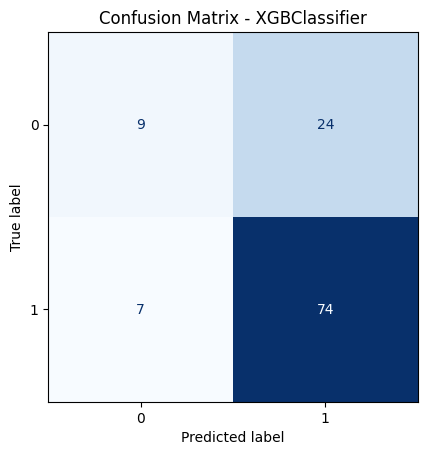

In [38]:
pipeline.set_params(model=XGBClassifier(
    n_estimators=200,
    max_depth=4,
    learning_rate=0.05,
    subsample=0.8,
    colsample_bytree=0.8,
    eval_metric='logloss',
    random_state=42))
pipeline.fit(X_train, y_train)

y_pred = pipeline.predict(X_test)

from sklearn.metrics import (
    classification_report, 
    confusion_matrix, 
    accuracy_score, roc_curve, auc,
    ConfusionMatrixDisplay
)

# --- Accuracy ---
acc = accuracy_score(y_test, y_pred)
print("Accuracy Score:", acc)


# --- Classification report ---
print("\nClassification Report:\n")
print(classification_report(y_test, y_pred))



# --- Confusion Matrix (numeric) ---
cm = confusion_matrix(y_test, y_pred)
print("\nConfusion Matrix (raw numbers):\n", cm)

# --- Detailed Confusion Matrix with labels ---
tn, fp, fn, tp = cm.ravel()

print("\nDetailed Confusion Matrix:")
print(f"True Negative (TN): {tn}")
print(f"False Positive (FP): {fp}")
print(f"False Negative (FN): {fn}")
print(f"True Positive (TP): {tp}")

# --- Pretty plotted Confusion Matrix ---
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=["0", "1"])
plt.figure(figsize=(6,4))
disp.plot(cmap="Blues", colorbar=False)
plt.title("Confusion Matrix - XGBClassifier")
plt.show()



AUROC: 0.7553


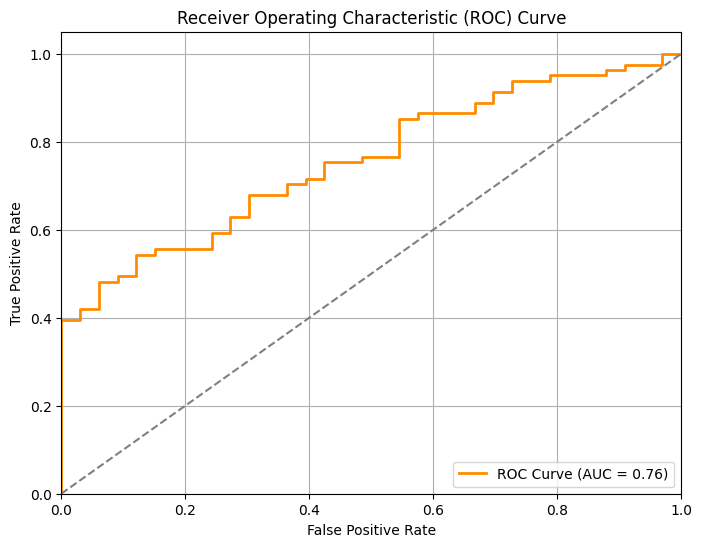

In [39]:

from sklearn.metrics import (roc_curve, auc)
#  ROC Curve
fpr, tpr, thresholds = roc_curve(y_test, pipeline.predict_proba(X_test)[:,1])

#  AUROC
roc_auc = auc(fpr, tpr)
print(f"AUROC: {roc_auc:.4f}")

plt.figure(figsize=(8, 6))
plt.plot(fpr, tpr, color='darkorange', lw=2, label=f'ROC Curve (AUC = {roc_auc:.2f})')
plt.plot([0, 1], [0, 1], color='gray', linestyle='--')  # Diagonal
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) Curve')
plt.legend(loc='lower right')
plt.grid(True)
plt.show()

In [40]:
print(pipeline.named_steps.keys())


dict_keys(['preprocess', 'smote', 'model'])


In [41]:
from sklearn.model_selection import GridSearchCV
from xgboost import XGBClassifier
import joblib


# Class imbalance handling
#negative / positive ratio

scale_pos_weight = 131 / 325  # imbalance ratio ≈ 0.4

xgb_model = XGBClassifier(
    eval_metric='logloss',
    random_state=42,
    scale_pos_weight=scale_pos_weight
)
#,enable_categorical=True  # 👈 Important
#  Update Pipeline Model
# -----------------------------
pipeline.set_params(model=xgb_model)

param_grid = {
    'model__max_depth': [3, 4, 5],
    'model__learning_rate': [0.05, 0.1, 0.2],
    'model__n_estimators': [100, 200, 300],
    'model__subsample': [0.8, 1],
    'model__colsample_bytree': [0.8, 1],
    'model__gamma': [0, 0.1, 0.3]
}

grid = GridSearchCV(
    pipeline,
    param_grid=param_grid,
    scoring='f1_macro',  # focus on both classes
    cv=5,
    n_jobs=-1,
    verbose=1
)
# 1️⃣ Identify categorical columns
#cat_cols = X_train.select_dtypes(include=['object']).columns
#print("Categorical columns:", cat_cols.tolist())

# 2️⃣ One-hot encode categorical columns
#X_train = pd.get_dummies(X_train, drop_first=True)
#X_test = pd.get_dummies(X_test, drop_first=True)

# 3️⃣ Align columns in train/test
#X_train, X_test = X_train.align(X_test, join='left', axis=1, fill_value=0)

# ✅ Now run GridSearchCV safely
grid.fit(X_train, y_train)


print("Best Hyperparameters:", grid.best_params_)
print("Best F1 Score:", grid.best_score_)

# Save best pipeline
best_pipeline = grid.best_estimator_

joblib.dump({
    'pipeline': best_pipeline,
    'numeric_features': num_cols,
    'categorical_features': cat_cols,
    'feature_names': Feature_Names
}, "liver_pipeline.joblib")

print("liver_pipeline saved successfully!")



Fitting 5 folds for each of 324 candidates, totalling 1620 fits
Best Hyperparameters: {'model__colsample_bytree': 1, 'model__gamma': 0.1, 'model__learning_rate': 0.2, 'model__max_depth': 3, 'model__n_estimators': 200, 'model__subsample': 0.8}
Best F1 Score: 0.6066640528611714
liver_pipeline saved successfully!


🧪 Accuracy: 0.7105

📋 Classification Report:
              precision    recall  f1-score   support

           0       0.50      0.36      0.42        33
           1       0.77      0.85      0.81        81

    accuracy                           0.71       114
   macro avg       0.63      0.61      0.61       114
weighted avg       0.69      0.71      0.70       114



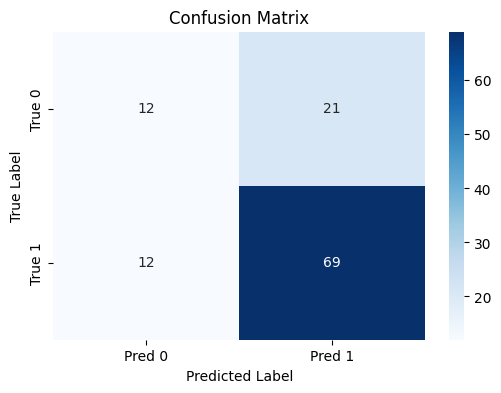


🔵 AUROC Score: 0.7355


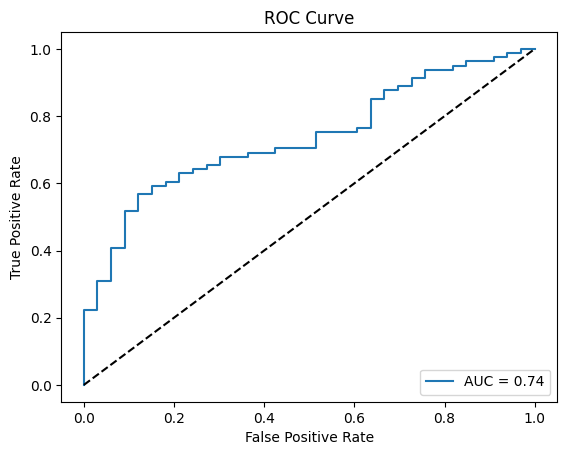

In [42]:
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix, roc_auc_score, roc_curve
import matplotlib.pyplot as plt
import seaborn as sns

# -----------------------------
# 1️⃣ Predict on Train & Test Data
# -----------------------------
y_train_pred = best_pipeline.predict(X_train)
y_test_pred = best_pipeline.predict(X_test)

# -----------------------------
# 2️⃣ Accuracy
# -----------------------------
Accuracy = accuracy_score(y_test, y_test_pred)

print(f"🧪 Accuracy: {Accuracy:.4f}")

# -----------------------------
# 3️⃣ Classification Report
# -----------------------------
print("\n📋 Classification Report:")
print(classification_report(y_test, y_test_pred))

# -----------------------------
# 4️⃣ Confusion Matrix
# -----------------------------
cm = confusion_matrix(y_test, y_test_pred)
plt.figure(figsize=(6,4))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=['Pred 0','Pred 1'], yticklabels=['True 0','True 1'])
plt.title("Confusion Matrix")
plt.ylabel("True Label")
plt.xlabel("Predicted Label")
plt.show()

# -----------------------------
# 5️⃣ AUROC Score
# -----------------------------
if hasattr(best_pipeline, "predict_proba"):
    y_test_proba = best_pipeline.predict_proba(X_test)[:, 1]
    auroc = roc_auc_score(y_test, y_test_proba)
    print(f"\n🔵 AUROC Score: {auroc:.4f}")

    # Optional ROC Curve Plot
    fpr, tpr, _ = roc_curve(y_test, y_test_proba)
    plt.figure()
    plt.plot(fpr, tpr, label=f'AUC = {auroc:.2f}')
    plt.plot([0,1], [0,1], 'k--')
    plt.xlabel('False Positive Rate')
    plt.ylabel('True Positive Rate')
    plt.title('ROC Curve')
    plt.legend(loc='lower right')
    plt.show()
else:
    print("⚠️ AUROC cannot be calculated because model does not support probability predictions.")
